# Lab 2: Getting started with NerworkX (Part II) 

## Exercises 1–5 (Recap)
We created and saved a simple actor network in the following way: 

In [123]:
import matplotlib.pyplot as plt
import networkx as nx
actorRels = [
["Marlon Brando", "Al Pacino"],
["Marlon Brando", "Henry Silva"],
["Henry Silva", "Al Pacino"],
["Al Pacino", "Michelle Pfeiffer"]
]
actorGraph = nx.Graph()
actorGraph.add_edges_from(actorRels)
nx.write_pajek(actorGraph, "actorGraph.net", encoding='UTF-8')


Then we loaded the saved data and created a new graph to which we added some additional connections (using two methods). 

In [124]:

G = nx.read_pajek("actorGraph.net", encoding='UTF-8')
G.add_edge("Al Pacino", "Margot Robbie")
additionalRels = [
["Margot Robbie", "Leonardo DiCaprio"],
["Margot Robbie", "Brad Pitt"],
["Margot Robbie", "Emile Hirsch"],
["Al Pacino", "Leonardo DiCaprio"],
["Al Pacino", "Brad Pitt"],
["Al Pacino", "Emile Hirsch"],
["Leonardo DiCaprio", "Brad Pitt"],
["Leonardo DiCaprio", "Emile Hirsch"],
["Brad Pitt", "Emile Hirsch"]
]
G.add_edges_from(additionalRels)


[0, 0, 0, 0, 0, 0, 0, 0, 0]

We have learned how to find the density of our network and the degrees of our nodes: 

In [125]:

print("The density is:", nx.density(G))
print("The degrees of my nodes are:", G.degree())
print("The degree of Margot Robbie is:", G.degree("Margot Robbie"))


The density is: 0.5
The degrees of my nodes are: [('Marlon Brando', 2), ('Al Pacino', 7), ('Henry Silva', 2), ('Michelle Pfeiffer', 1), ('Margot Robbie', 4), ('Leonardo DiCaprio', 4), ('Brad Pitt', 4), ('Emile Hirsch', 4)]
The degree of Margot Robbie is: 4


## Exercise 6 (solutions)
Then in exercise 6.1 we tested the density: 



In [126]:
# Solution 1 - using complete graphs
print("Solution 1:")
n = G.number_of_nodes()
G_compl = nx.complete_graph(n)
print("In our network G we have", n, "nodes")
print("In our network we have", G.number_of_edges(), "links (edges)")
print("Number of links (edges) in a complete graph of", n, "vertices (nodes) is:", G_compl.number_of_edges())

network_density_1 = G.number_of_edges() / G_compl.number_of_edges()
print("So the density of our network G is", network_density_1)

# Solution 2 - using Lmax formula
print("Solution 2:")
Lmax = n * (n-1)/2 # In undirected network: Lmax = N(N – 1)/2 
network_density_2 = G.number_of_edges() / Lmax  # L/Lmax
print("The maximum number of links in our network G is:", Lmax) 
print("The density of our network G is:", network_density_2)
 



Solution 1:
In our network G we have 8 nodes
In our network we have 14 links (edges)
Number of links (edges) in a complete graph of 8 vertices (nodes) is: 28
So the density of our network G is 0.5
Solution 2:
The maximum number of links in our network G is: 28.0
The density of our network G is: 0.5



In Exercise 6.2 we calculated the average degree for nodes in our network


In [127]:
average_degree = 2 * G.number_of_edges() / G.number_of_nodes() # The average degree: 2L / N
print(average_degree)

3.5


And in Exercise 6.3 we saved our new graph as PNG and NET: 

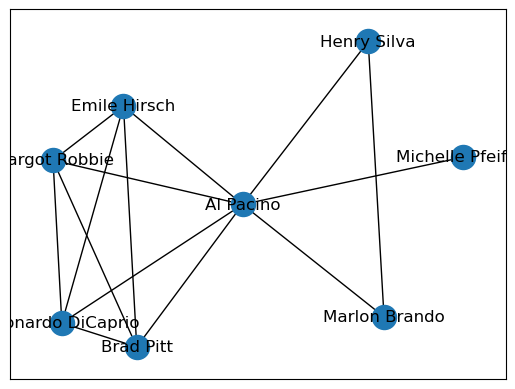

In [128]:
nx.write_pajek(G, "actorGraph_updated.net", encoding='UTF-8')
nx.draw_networkx(G)
plt.savefig("actorGraph_updated.png", format="PNG")


## Exercise 7 (solution)

Your homework was to use the skills you've acquired to create a directed network and find some of its measures.

### Task: 
Recreate our simple four-node digraph from the lecture (directed and unweighted) which has the following edges: edge(1,2) edge(1,3) edge(3,2) edge(3,4) edge(4,3)

Calculate: 
- network's density (and test it by comparing to complete directed graph)
- degrees of all the nodes
- average degrees

Network def:

Edges: 5
Nodes: 4


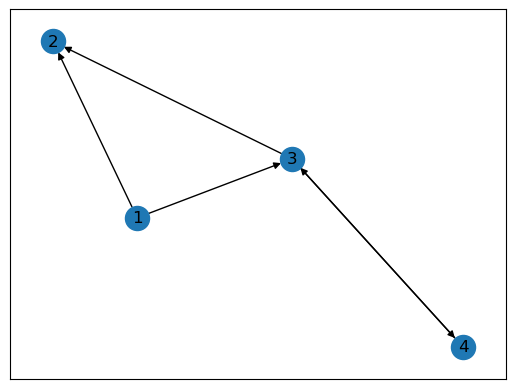

In [129]:
D = nx.DiGraph()
D.add_edge(1,2)
D.add_edge(1,3)
D.add_edge(3,2)
D.add_edge(3,4)
D.add_edge(4,3)
print("Edges:", D.number_of_edges())
print("Nodes:", D.number_of_nodes())
nx.draw_networkx(D)

7.1 Density

In [132]:
print("Density:", nx.density(D))
N = D.number_of_nodes()
#Solution1
print("Solution1")
D_compl = nx.complete_graph(N, nx.DiGraph)
print("The maximum number of links in a complete digraph with 4 nodes is", D_compl.number_of_edges())
print("A complete graph has the density:", nx.density(D_compl))
density1 = D.number_of_edges() / D_compl.number_of_edges()
print("Our graph with", D.number_of_edges(), "edges has the density:", density1)
#Solution2
print("Solution2")
Lmax = N * (N-1) #Lmax = N(N–1)
print("Lmax is:", Lmax)
density2 = D.number_of_edges() / Lmax 
print("So the density of our graph is:", density2 )

Density: 0.4166666666666667
Solution1
The maximum number of links in a complete digraph with 4 nodes is 12
A complete graph has the density: 1.0
Our graph with 5 edges has the density: 0.4166666666666667
Solution2
Lmax is: 12
So the density of our graph is: 0.4166666666666667


7.2 Degrees

In [209]:
print("The total degrees of the nodes are:", D.degree)
print("The in-degrees are:", D.in_degree)
print("The out-degrees are:", D.out_degree)
# We can access degrees of each node:
print("The total degree of node 1 is:", D.degree(1))
print("In-degree of node 1 is:", D.in_degree(1))
print("Out-degree of node 1 is:", D.out_degree(1))



The total degrees of the nodes are: [(1, 2), (2, 2), (3, 4), (4, 2)]
The in-degrees are: [(1, 0), (2, 2), (3, 2), (4, 1)]
The out-degrees are: [(1, 2), (2, 0), (3, 2), (4, 1)]
The total degree of node 1 is: 2
In-degree of node 1 is: 0
Out-degree of node 1 is: 2


7.3 Average degrees

In [195]:
# Average degree = 2L/N
average_total_degree_digraph = 2 * D.number_of_edges() / D.number_of_nodes()
print("Average degree is:", average_total_degree_digraph)
# Average in-degree = average out-degree = L/N
average_in_degree_digraph = D.number_of_edges() / D.number_of_nodes()
print("Average in-degree is:", average_in_degree_digraph )
average_out_degree_digraph = D.number_of_edges() / D.number_of_nodes()
print("Average out-degree is:" , average_out_degree_digraph)

Average degree is: 2.5
Average in-degree is: 1.25
Average out-degree is: 1.25


Now let's test it the hard way:

In [207]:
# Let's start by recreating the edge list of our digraph. 
edges = D.edges
print("Our edges are:", edges)
# Now create an empty dictionary where we will sore info about the degrees of each node, degree_dict:
degree_dict = {}
print(degree_dict)
# Now let's loop through our list of edges and count the degrees of the nodes, we will print each step so you see what's happening: 
for source, target in edges: 
    if source not in degree_dict:
        degree_dict[source] = {"in": 0, "out" : 0}
        print(degree_dict, "The length of the dictionary is:", len(degree_dict))
    if target not in degree_dict:
        degree_dict[target] = {"in": 0, "out" : 0}
        print(degree_dict, "The length of the dictionary is:", len(degree_dict))
    degree_dict[source]["out"] += 1
    degree_dict[target]["in"] +=1
print("Now we have a dictionary that looks like this:", degree_dict)
print("The length of the dictionary is:", len(degree_dict), "- it should be the same as nr of nodes in the network, which is", D.number_of_nodes())

# Now let's count the total degree for the entire network
total_degree = 0 
for node, degrees in degree_dict.items():
    node_total_degree = degrees["in"] + degrees["out"]
    total_degree += node_total_degree
print("The total degree in the network is:", total_degree, "- it should be the same as 2 times nr of edges", D.number_of_edges())
# Now let's divide our total degree by the number of nodes (the length of the dictionary we created)
average_degree_digraph2 = total_degree / len(degree_dict)    
print("The average degree in our digraph is:", average_degree_digraph2)


Our edges are: [(1, 2), (1, 3), (3, 2), (3, 4), (4, 3)]
{}
{1: {'in': 0, 'out': 0}} The length of the dictionary is: 1
{1: {'in': 0, 'out': 0}, 2: {'in': 0, 'out': 0}} The length of the dictionary is: 2
{1: {'in': 0, 'out': 1}, 2: {'in': 1, 'out': 0}, 3: {'in': 0, 'out': 0}} The length of the dictionary is: 3
{1: {'in': 0, 'out': 2}, 2: {'in': 2, 'out': 0}, 3: {'in': 1, 'out': 1}, 4: {'in': 0, 'out': 0}} The length of the dictionary is: 4
Now we have a dictionary that looks like this: {1: {'in': 0, 'out': 2}, 2: {'in': 2, 'out': 0}, 3: {'in': 2, 'out': 2}, 4: {'in': 1, 'out': 1}}
The length of the dictionary is: 4 - it should be the same as nr of nodes in the network, which is 4
The total degree in the network is: 10 - it should be the same as 2 times nr of edges 5
The average degree in our digraph is: 2.5


Can you modify the cell above to get average in-degree and out-degree for all the nodes in this digraph? 